# <font color=red>A Detailed Study on PCA</font>

### <font color=blue>A Summary of the PCA Approach</font>


- Standardize the data.<br>
- Find the Covariance Matrix<br>
- Obtain the Eigenvectors and Eigenvalues from the covariance matrix.<br>
- Sort eigenvalues in descending order and choose the k eigenvectors that correspond to the k largest eigenvalues where k is the number of dimensions of the new feature subspace (k≤d)/.<br>
- Construct the projection matrix W from the selected k eigenvectors.<br>
- Transform the original dataset X via W to obtain a k-dimensional feature subspace Y.<br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["target"].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

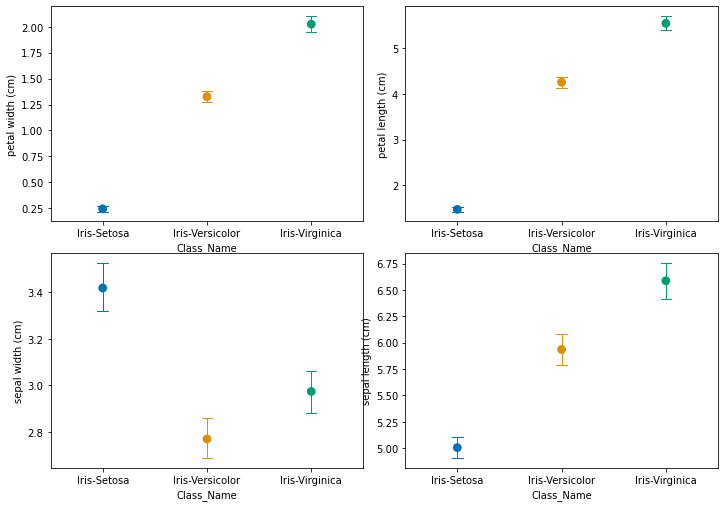

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()
plt.subplot(2,2,1)
sns.pointplot(data=df, x='Class_Name', y='petal width (cm)', dodge=True, markers=['o', 's'],   capsize=.1, errwidth=1, palette='colorblind')
plt.subplot(2,2,2)
sns.pointplot(data=df, x='Class_Name', y='petal length (cm)', dodge=True, markers=['o', 's'],   capsize=.1, errwidth=1, palette='colorblind')
plt.subplot(2,2,3)
sns.pointplot(data=df, x='Class_Name', y='sepal width (cm)', dodge=True, markers=['o', 's'],   capsize=.1, errwidth=1, palette='colorblind')
plt.subplot(2,2,4)
sns.pointplot(data=df, x='Class_Name', y='sepal length (cm)', dodge=True, markers=['o', 's'],   capsize=.1, errwidth=1, palette='colorblind')





In [9]:
df.groupby(['Class_Name'])['petal length (cm)'].agg(['mean', 'std'])

,mean,std
Class_Name,,
Iris-Setosa,1.464,0.173511
Iris-Versicolor,4.260,0.469911
Iris-Virginica,5.552,0.551895


In [10]:
df.rename(columns = {'petal length (cm)':'petal_length'}, inplace = True)

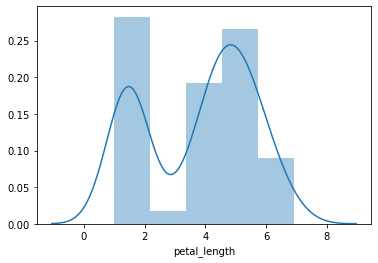

In [11]:
sns.distplot(df["petal_length"])


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm=ols('petal_length ~ Class_Name',data=df).fit()
table=sm.stats.anova_lm(lm)
print(table)

               df      sum_sq     mean_sq            F        PR(>F)
Class_Name    2.0  436.643733  218.321867  1179.034328  3.051976e-91
Residual    147.0   27.220000    0.185170          NaN           NaN


In [13]:
format(float('3.051976e-91'), '.7f')

'0.0000000'

In [14]:
# Seeing if the overall model is significant
print(f"Overall model F({lm.df_model: .0f},{lm.df_resid: .0f}) = {lm.fvalue: .3f}, p = {lm.f_pvalue: .4f}")


Overall model F( 2, 147) =  1179.034, p =  0.0000


In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1179.
Date:                Thu, 03 Sep 2020   Prob (F-statistic):           3.05e-91
Time:                        07:59:07   Log-Likelihood:                -84.840
No. Observations:                 150   AIC:                             175.7
Df Residuals:                     147   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.4640      0.061     24.057      0.000       1.344       1.584
Class_Name[T.Iris-Versicolor]     2.7960      0.086     32.488      0.000       2.626       2.966
Class_Name[T.Iris-Virginica]      4.0880      0.086     47.500      0.000       3.918       4.258
==============================================================================
Omnibus:                        4.393   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                5.370
Skew:                           0.121   Prob(JB):                       0.0682
Kurtosis:                       3.895   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:

for i, ax in enumerate(axes.flat):
    print(i,ax)

0 AxesSubplot(0.0469444,0.544444;0.434444x0.42619)
1 AxesSubplot(0.539444,0.544444;0.434444x0.42619)
2 AxesSubplot(0.0469444,0.0551587;0.434444x0.42619)
3 AxesSubplot(0.539444,0.0551587;0.434444x0.42619)


In [17]:
df.columns[plots[0][0]]

NameError: name 'plots' is not defined

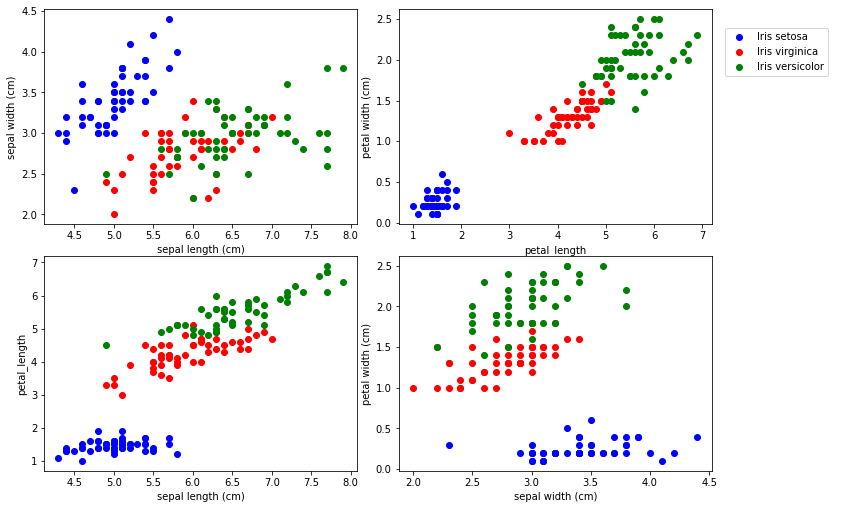

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

# Standardizing

In [19]:
df.head(1)

,sepal length (cm),sepal width (cm),petal_length,petal width (cm),target,Class_Name
0,5.1,3.5,1.4,0.2,0.0,Iris-Setosa


In [4]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

# Covariance Matrix

In [26]:
# import numpy as np
# mean_vec = np.mean(X_std, axis=0)
# cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)

In [7]:
import numpy as np
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [19]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


# Eigendecomposition - Computing Eigenvectors and Eigenvalues

- The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
([2.93808505,[ 0.52106591 -0.37741762 -0.71956635  0.26128628]],
)

In [21]:
eigen_vector1=[ 0.52106591 -0.37741762 -0.71956635  0.26128628]

SyntaxError: invalid syntax (<ipython-input-21-731a333bbed5>, line 1)

In [9]:
2.9+0.92+0.14+0.02

3.98

In [10]:
2.9/3.98

0.728643216080402

In [11]:
0.92/3.98

0.23115577889447236

In [12]:
0.14/3.98

0.03517587939698493

In [14]:
(0.02/3.98)*100

0.5025125628140703

In [15]:
(0.92+2.9)/3.98 * 100

95.97989949748744

# Selecting Principal Components

- The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. However, the eigenvectors only define the directions of the new axis, since they have all the same unit length 1, which can confirmed by the following two lines of code:





In [23]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


- In order to decide which eigenvector(s) can be dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.
- In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.

In [22]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i)

Eigenvalues in descending order:
(2.938085050199996, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(0.9201649041624876, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(0.1477418210449481, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(0.020853862176462387, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [25]:
2.9+0.92+0.14+0.02

3.98

In [26]:
(2.9/3.98)*100

72.8643216080402

In [27]:
(0.92740/3.98)*100

23.301507537688444

### How many Principal Component to select

- After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [16]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


In [18]:
var_exp

[72.96244541329987, 22.850761786701764, 3.668921889282876, 0.5178709107154823]

In [19]:
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

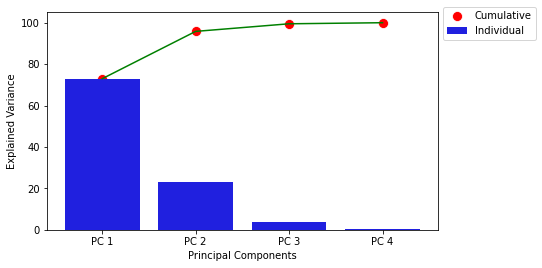

In [31]:
import seaborn as sns
fig_dims = (7, 4)
x=["PC1","PC2"]
y=[72,23,3,0.5]
y=[72,95,99,]
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=['PC %s' %i for i in range(1,5)], y=var_exp,
            label="Individual", color="b")
sns.scatterplot(x=['PC %s' %i for i in range(1,5)], y=cum_var_exp,
            label="Cumulative",s=100, color="r")
sns.lineplot(x=['PC %s' %i for i in range(1,5)], y=cum_var_exp,color="g")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance")
plt.legend(loc=3, bbox_to_anchor=(1.0,0.85))

# Projection Onto the New Feature Space

- In this last step we will use the 4×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation<br>
<br>
- <font color=red>Y=X×W, where Y is a 150×2 matrix of our transformed samples.</font>

In [25]:
#eig_pairs[1][1]
eig_pairs[0][1].reshape(4,1)

array([[ 0.52106591],
       [-0.26934744],
       [ 0.5804131 ],
       [ 0.56485654]])

In [26]:
 eig_pairs[1][1].reshape(4,1)

array([[-0.37741762],
       [-0.92329566],
       [-0.02449161],
       [-0.06694199]])

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
matrix W---->4 * 2

In [44]:
X_std.shape

(150, 4)

In [ ]:
150 * 4    multiply with 4 * 2------>150 * 2

In [45]:
matrix_w.shape

(4, 2)

In [28]:
Y = X_std.dot(matrix_w)

In [29]:
Y.shape

(150, 2)

In [31]:

dfx_trans = pd.DataFrame(data=Y)


In [32]:
dfx_trans

,0,1
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835
...,...,...
145,1.870503,-0.386966
146,1.564580,0.896687
147,1.521170,-0.269069
148,1.372788,-1.011254


In [46]:
df.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


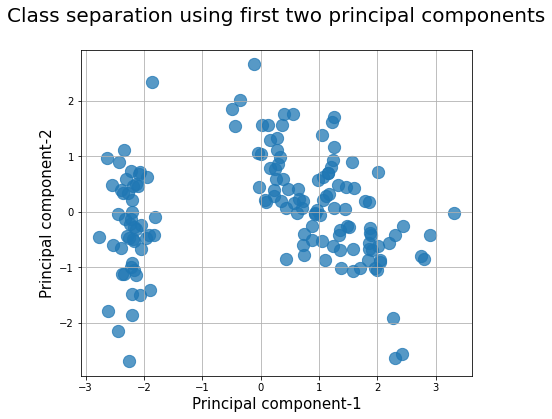

In [33]:
plt.figure(figsize=(7,6))
plt.scatter(dfx_trans[0],dfx_trans[1],alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()


# PCA in scikit-learn

In [39]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [38]:
sklearn_pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [35]:
Y_sklearn.shape

(150, 4)

In [36]:
Y_sklearn

array([[-2.26470281e+00,  4.80026597e-01, -1.27706022e-01,
        -2.41682039e-02],
       [-2.08096115e+00, -6.74133557e-01, -2.34608854e-01,
        -1.03006775e-01],
       [-2.36422905e+00, -3.41908024e-01,  4.42014848e-02,
        -2.83770534e-02],
       [-2.29938422e+00, -5.97394508e-01,  9.12901063e-02,
         6.59555596e-02],
       [-2.38984217e+00,  6.46835383e-01,  1.57381957e-02,
         3.59228133e-02],
       [-2.07563095e+00,  1.48917752e+00,  2.69682944e-02,
        -6.60818022e-03],
       [-2.44402884e+00,  4.76441976e-02,  3.35470401e-01,
         3.67755572e-02],
       [-2.23284716e+00,  2.23148073e-01, -8.86954979e-02,
         2.46120962e-02],
       [-2.33464048e+00, -1.11532768e+00,  1.45076864e-01,
         2.68592208e-02],
       [-2.18432817e+00, -4.69013561e-01, -2.53765567e-01,
         3.98992877e-02],
       [-2.16631010e+00,  1.04369065e+00, -2.68681102e-01,
        -1.67313672e-02],
       [-2.32613087e+00,  1.33078335e-01,  9.37592444e-02,
      

In [74]:
dfx_trans = pd.DataFrame(data=Y_sklearn)

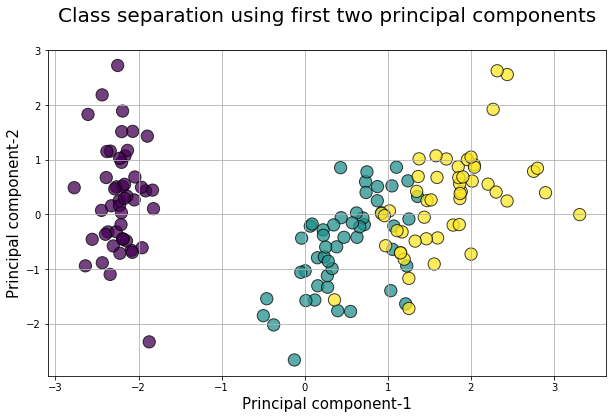

In [75]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['target'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()
